In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import pickle
from analysis_util import *
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["font.size"] = 20
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["savefig.bbox"] = "tight"
# plot-settings:
markers = ["o", "v", "s", "x", "d"]
colors = plt.cm.plasma(np.linspace(0, 1, len(markers)))
ps = {
    "GP": {"c": colors[0], "m": markers[0]},
    "RF": {"c": colors[1], "m": markers[1]},
    "BNN": {"c": colors[2], "m": markers[2]},
    "DE": {"c": colors[3], 'm':markers[3]},
}

def regret_vs_calib_plot(df, save_fig=False, aggregate="None", regret="tot", plot_name=None):
    if aggregate == "None":
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        for i_s, surrogate in enumerate(surrogates):
            if surrogate != "RS":
                selection = df[(df['surrogate']==surrogate) & (df['acquisition'] != "RS")]
                if regret == "tot":
                    xs = selection['tot_regret_pool']
                else:
                    xs = selection['inst_regret_pool']
                ys = selection['calibration_mse']
                plt.scatter(xs, ys,  marker=ps[surrogate]['m'], color=ps[surrogate]['c'], label=surrogate)
            else:
                selection = df[(df['acquisition'] == "RS")]
                if regret == "tot":
                    xs = selection['tot_regret_pool']
                else:
                    xs = selection['inst_regret_pool']
                ys = selection['calibration_mse']
                plt.scatter(xs, ys, marker=markers[i_s], color=colors[i_s], label=surrogate)
    elif aggregate=="seeds":
        datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
        acquisitions = ['EI', 'UCB', 'TS']
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        aggregate_dict = {'surrogate': [], 'inst_regret_pool':[], 'tot_regret_pool':[], 'calibration_mse':[]}
        for surrogate in surrogates:
            for acq in acquisitions:
                for dataset in datasets:
                    if surrogate != "RS":
                        selection = df[(df['surrogate'] == surrogate) & (df['acquisition']==acq) & (df['data'] == dataset)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
                    else:
                        selection = df[(df['acquisition']==acq) & (df['data'] == dataset)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
        aggregate_df = pd.DataFrame.from_dict(aggregate_dict)
        for i_s, surrogate in enumerate(surrogates):
            selection = aggregate_df[(aggregate_df['surrogate']==surrogate)]
            if regret == "tot":
                xs = selection['tot_regret_pool']
            else:
                xs = selection['inst_regret_pool']
            ys = selection['calibration_mse']
            plt.scatter(xs, ys,  marker=ps[surrogate]['m'], color=ps[surrogate]['c'], label=surrogate)
    elif aggregate=="data":
        seeds = set(df['seed'])
        acquisitions = ['EI', 'UCB', 'TS']
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        aggregate_dict = {'surrogate': [], 'inst_regret_pool':[], 'tot_regret_pool':[],'calibration_mse':[]}
        for surrogate in surrogates:
            for acq in acquisitions:
                for seed in seeds:
                    if surrogate != "RS":
                        selection = df[(df['surrogate'] == surrogate) & (df['acquisition']==acq) & (df['seed'] == seed)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
                    else:
                        selection = df[(df['acquisition']==acq) & (df['seed'] == seed)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
        aggregate_df = pd.DataFrame.from_dict(aggregate_dict)
        for i_s, surrogate in enumerate(surrogates):
            selection = aggregate_df[(aggregate_df['surrogate']==surrogate)]
            if regret == "tot":
                xs = selection['tot_regret_pool']
            else:
                xs = selection['inst_regret_pool']
            ys = selection['calibration_mse']
            plt.scatter(xs, ys,  marker=ps[surrogate]['m'], color=ps[surrogate]['c'], label=surrogate)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel('regret')
    plt.ylabel('calib')
    plt.legend()
    if plot_name is not None:
        plt.savefig('./plots/'+plot_name)
    plt.show()

def regret_vs_calib_iid_plot(df, save_fig=False, aggregate="None", regret="tot", plot_name=None):
    if aggregate == "None":
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        for i_s, surrogate in enumerate(surrogates):
                selection = df[(df['surrogate']==surrogate) & (df['acquisition'] == "RS")]
                if regret == "tot":
                    xs = selection['tot_regret_pool']
                else:
                    xs = selection['inst_regret_pool']
                ys = selection['calibration_mse']
                plt.scatter(xs, ys,  marker=ps[surrogate]['m'], color=ps[surrogate]['c'], label=surrogate)
    elif aggregate=="seeds":
        datasets = ['fashionmnist', 'fashionmnist_cnn', 'mnist', 'mnist_cnn', 'news', 'svm_wine']
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        aggregate_dict = {'surrogate': [], 'inst_regret_pool':[], 'tot_regret_pool':[], 'calibration_mse':[]}
        for surrogate in surrogates:
            for dataset in datasets:
                selection = df[(df['surrogate'] == surrogate) & (df['acquisition']=="RS") & (df['data'] == dataset)]
                aggregate_dict['surrogate'].append(surrogate)
                aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
        aggregate_df = pd.DataFrame.from_dict(aggregate_dict)
        for i_s, surrogate in enumerate(surrogates):
            selection = aggregate_df[(aggregate_df['surrogate']==surrogate)]
            if regret == "tot":
                xs = selection['tot_regret_pool']
            else:
                xs = selection['inst_regret_pool']
            ys = selection['calibration_mse']
            plt.scatter(xs, ys,  marker=ps[surrogate]['m'], color=ps[surrogate]['c'], label=surrogate)
    elif aggregate=="data":
        seeds = set(df['seed'])
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        aggregate_dict = {'surrogate': [], 'inst_regret_pool':[], 'tot_regret_pool':[],'calibration_mse':[]}
        for surrogate in surrogates:
            for seed in seeds:
                selection = df[(df['surrogate'] == surrogate) & (df['acquisition']=="RS") & (df['seed'] == seed)]
                aggregate_dict['surrogate'].append(surrogate)
                aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
        aggregate_df = pd.DataFrame.from_dict(aggregate_dict)
        for i_s, surrogate in enumerate(surrogates):
            selection = aggregate_df[(aggregate_df['surrogate']==surrogate)]
            if regret == "tot":
                xs = selection['tot_regret_pool']
            else:
                xs = selection['inst_regret_pool']
            ys = selection['calibration_mse']
            plt.scatter(xs, ys,  marker=ps[surrogate]['m'], color=ps[surrogate]['c'], label=surrogate)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel('Regret')
    plt.ylabel('ECE')
    plt.legend()
    if plot_name is not None:
        plt.savefig('./plots/'+plot_name)
    plt.show()
    
def regret_vs_calib_plot_synth(df, save_fig=False, aggregate="None", regret="tot", plot_name=None):
    if aggregate == "None":
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        for i_s, surrogate in enumerate(surrogates):
            if surrogate != "RS":
                selection = df[(df['surrogate']==surrogate) & (df['acquisition'] != "RS")]
                if regret == "tot":
                    xs = selection['tot_regret_pool']
                else:
                    xs = selection['inst_regret_pool']
                ys = selection['calibration_mse']
                plt.scatter(xs, ys,  marker=markers[i_s], color=colors[i_s], label=surrogate)
            else:
                selection = df[(df['acquisition'] == "RS")]
                if regret == "tot":
                    xs = selection['tot_regret_pool']
                else:
                    xs = selection['inst_regret_pool']
                ys = selection['calibration_mse']
                plt.scatter(xs, ys, marker=markers[i_s], color=colors[i_s], label=surrogate)
    elif aggregate=="seeds":
        problem_names = set(df['problem_name'])
        acquisitions = ['EI', 'UCB', 'TS']
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        aggregate_dict = {'surrogate': [], 'inst_regret_pool':[], 'tot_regret_pool':[], 'calibration_mse':[]}
        for surrogate in surrogates:
            for acq in acquisitions:
                for problem_name in problem_names:
                    if surrogate != "RS":
                        selection = df[(df['surrogate'] == surrogate) & (df['acquisition']==acq) & (df['problem_name'] == problem_name)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
                    else:
                        selection = df[(df['acquisition']==acq) & (df['data'] == dataset)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
        aggregate_df = pd.DataFrame.from_dict(aggregate_dict)
        for i_s, surrogate in enumerate(surrogates):
            selection = aggregate_df[(aggregate_df['surrogate']==surrogate)]
            if regret == "tot":
                xs = selection['tot_regret_pool']
            else:
                xs = selection['inst_regret_pool']
            ys = selection['calibration_mse']
            plt.scatter(xs, ys,  marker=markers[i_s], color=colors[i_s], label=surrogate)
    elif aggregate=="data":
        seeds = set(df['seed'])
        acquisitions = ['EI', 'UCB', 'TS']
        surrogates = ['BNN', 'DE', 'GP', 'RF']
        aggregate_dict = {'surrogate': [], 'inst_regret_pool':[], 'tot_regret_pool':[], 'calibration_mse':[]}
        for surrogate in surrogates:
            for acq in acquisitions:
                for seed in seeds:
                    if surrogate != "RS":
                        selection = df[(df['surrogate'] == surrogate) & (df['acquisition']==acq) & (df['seed'] == seed)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
                    else:
                        selection = df[(df['acquisition']==acq) & (df['seed'] == seed)]
                        aggregate_dict['surrogate'].append(surrogate)
                        aggregate_dict['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
                        aggregate_dict['tot_regret_pool'].append(selection['tot_regret_pool'].mean())
                        aggregate_dict['calibration_mse'].append(selection['calibration_mse'].mean())
        aggregate_df = pd.DataFrame.from_dict(aggregate_dict)
        for i_s, surrogate in enumerate(surrogates):
            selection = aggregate_df[(aggregate_df['surrogate']==surrogate)]
            if regret == "tot":
                xs = selection['tot_regret_pool']
            else:
                xs = selection['inst_regret_pool']
            ys = selection['calibration_mse']
            plt.scatter(xs, ys,  marker=markers[i_s], color=colors[i_s], label=surrogate)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel('Regret')
    plt.ylabel('ECE')
    plt.legend()
    if plot_name is not None:
        plt.savefig('./plots/'+plot_name)
    plt.show()

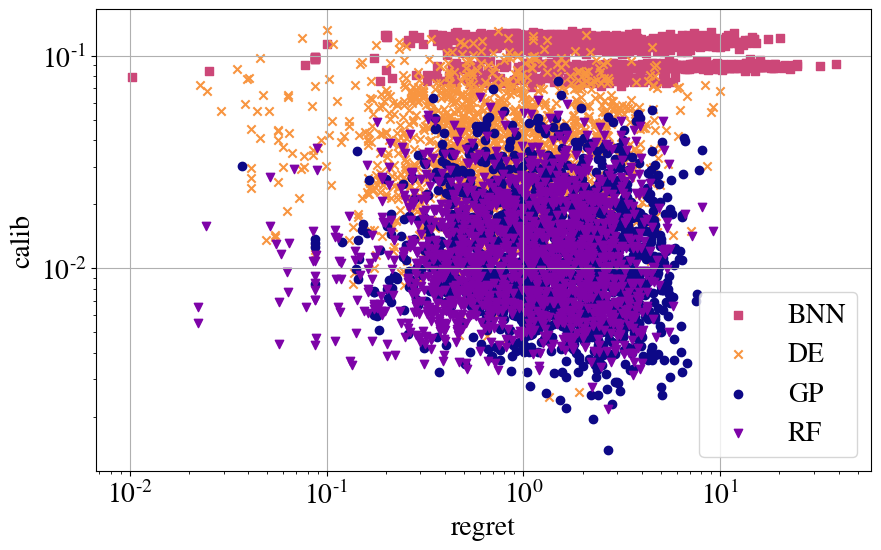

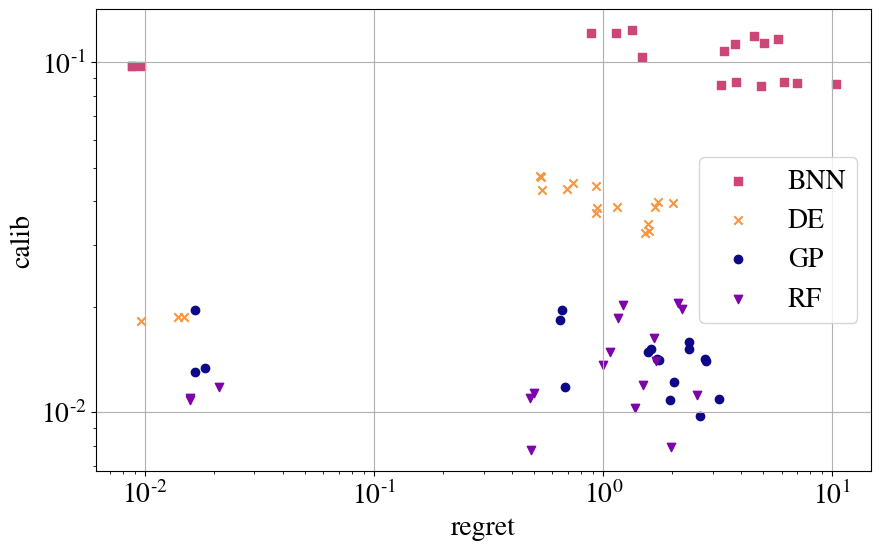

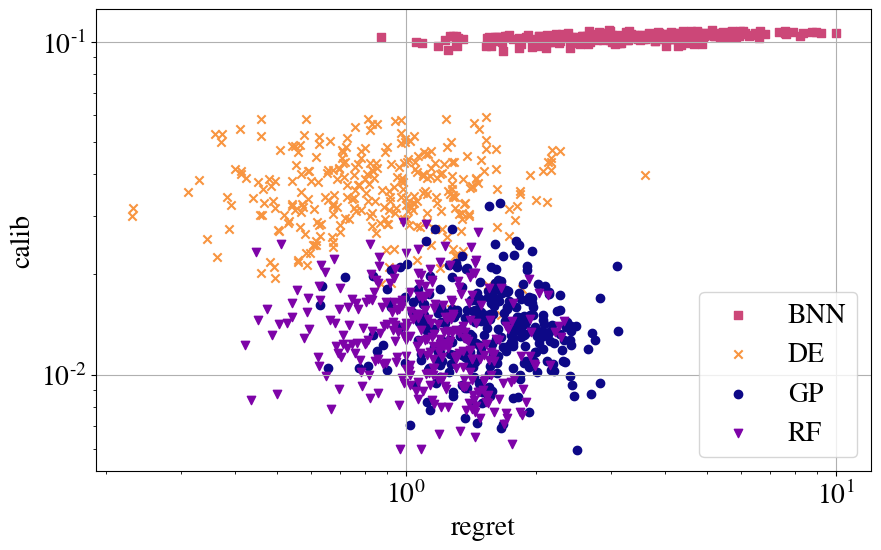

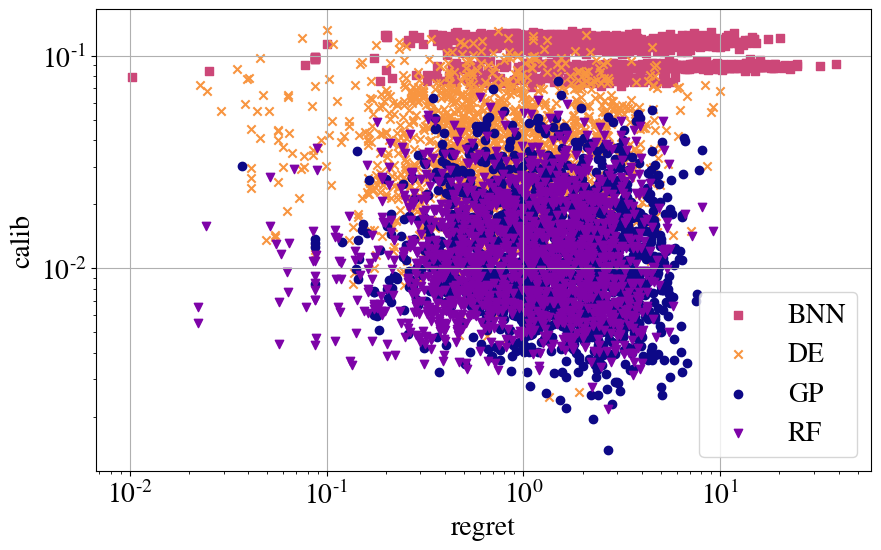

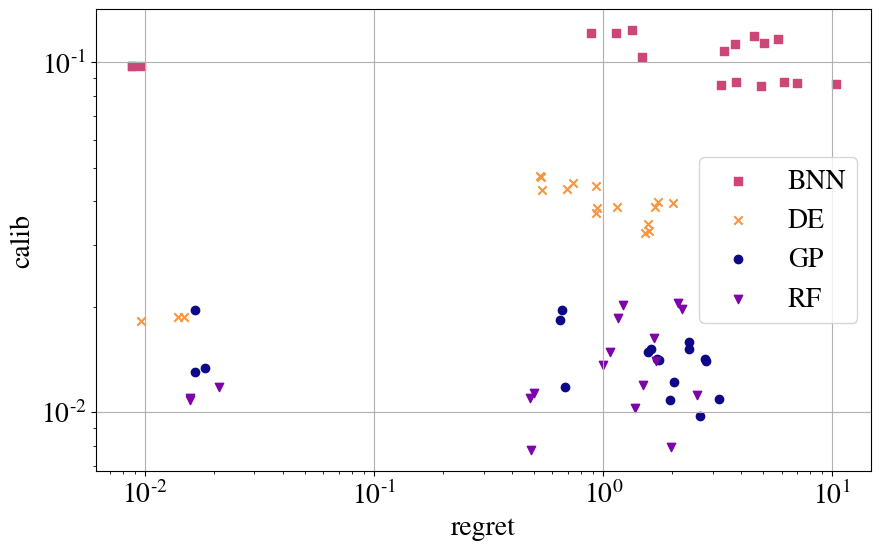

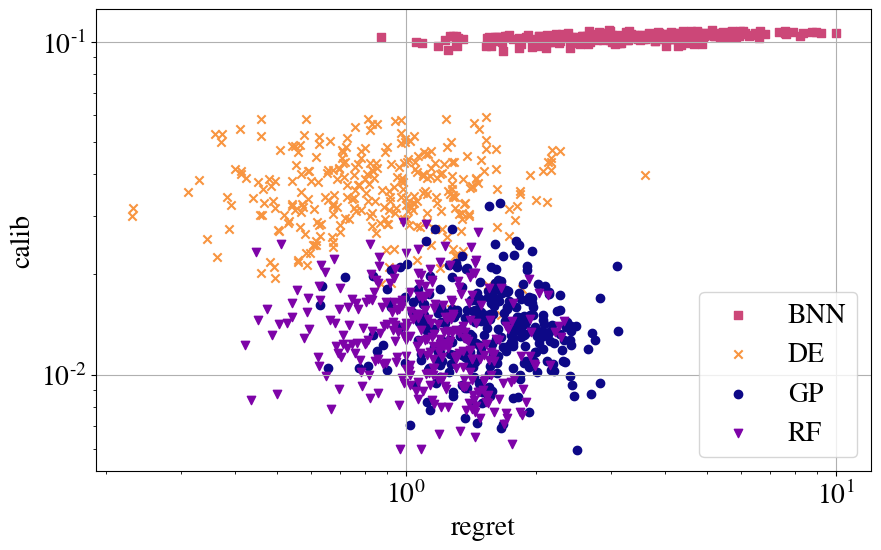

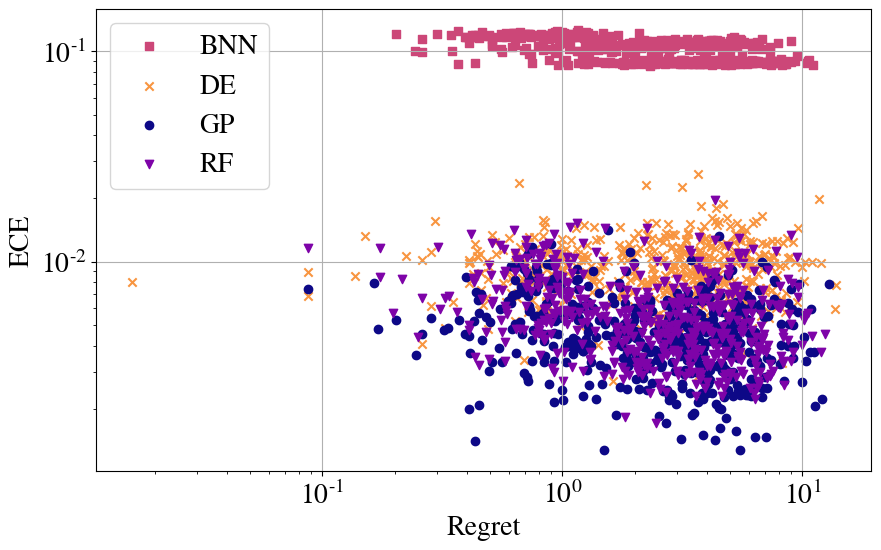

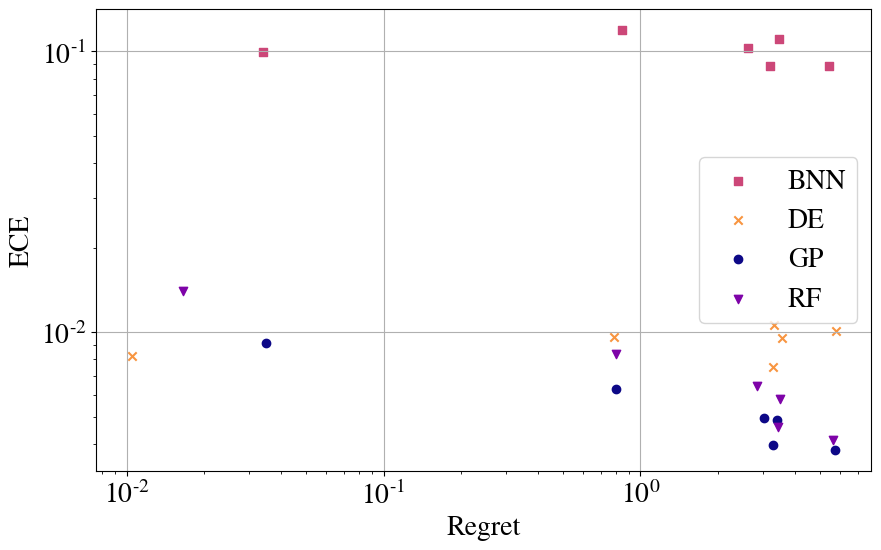

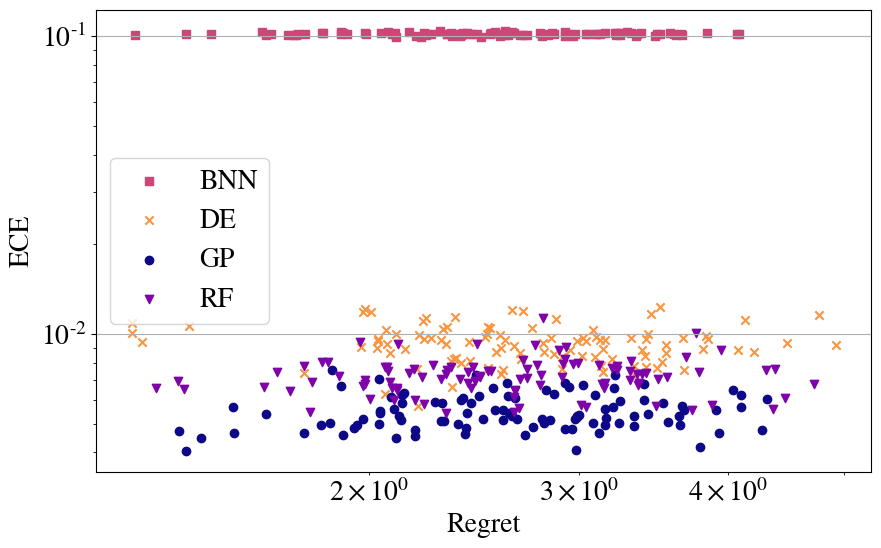

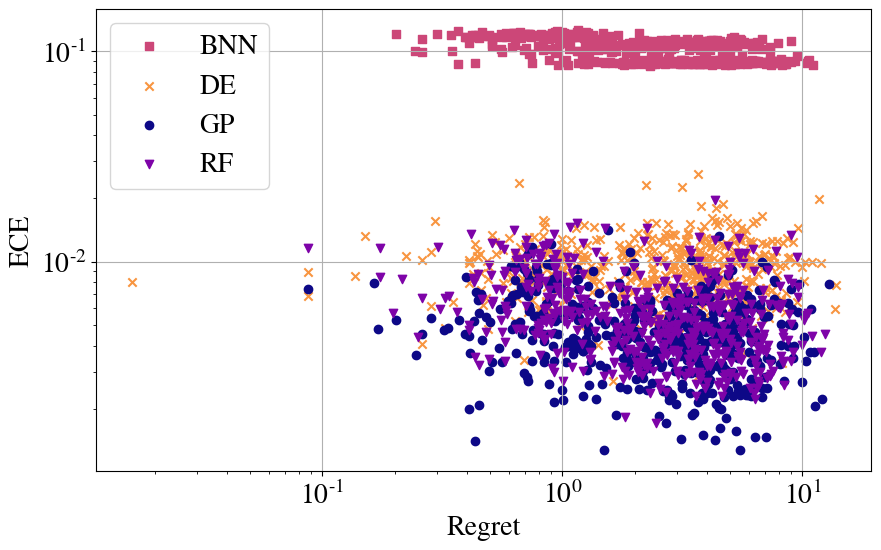

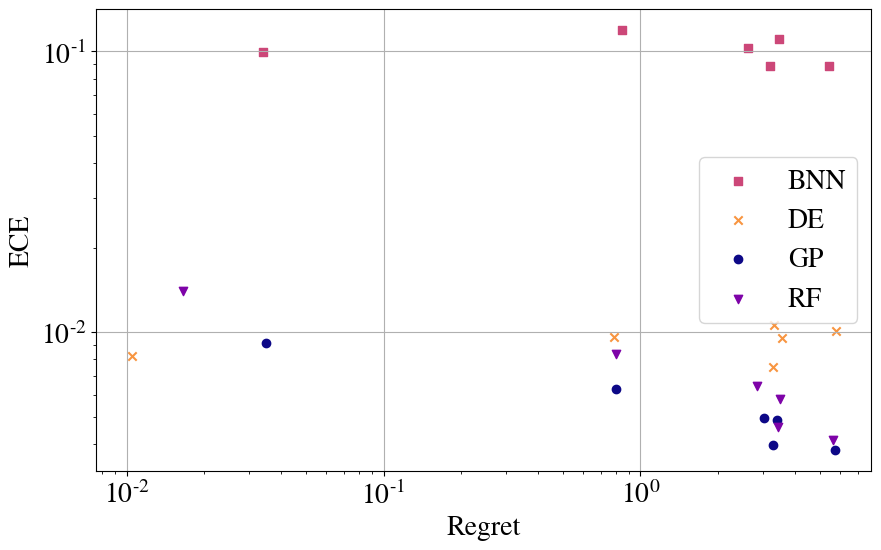

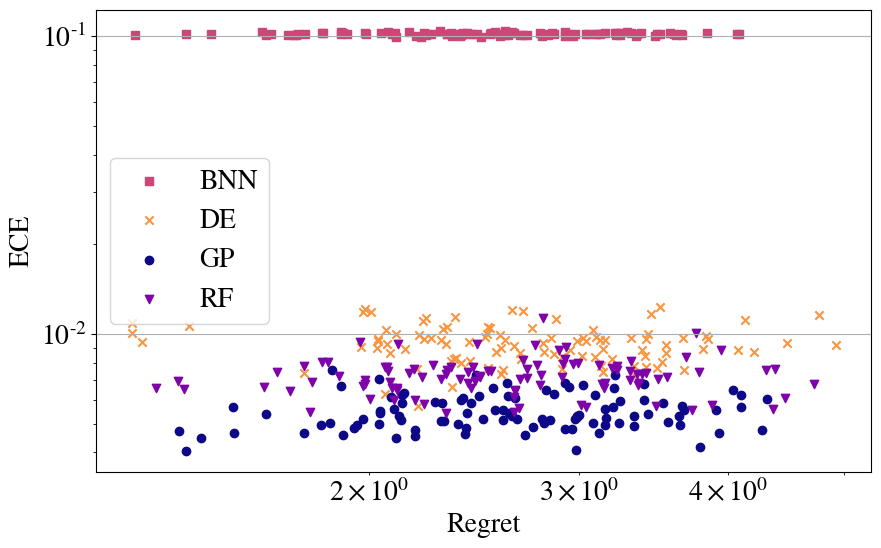

In [29]:
filehandler = open('parsed_results/real_results.obj', 'rb') 
real_results = pd.DataFrame.from_dict(pickle.load(filehandler))
aggregate_real_results_df = aggregate_real_results(real_results)
regret_vs_calib_plot(aggregate_real_results_df, plot_name="inst_regret_vs_calib_vanilla.pdf")
regret_vs_calib_plot(aggregate_real_results_df, aggregate="seeds", plot_name="inst_regret_vs_calib_seed.pdf")
regret_vs_calib_plot(aggregate_real_results_df, aggregate="data", plot_name="inst_regret_vs_calib_data.pdf")
regret_vs_calib_plot(aggregate_real_results_df, regret="tot", plot_name="tot_regret_vs_calib_vanilla.pdf")
regret_vs_calib_plot(aggregate_real_results_df, aggregate="seeds", regret="tot", plot_name="tot_regret_vs_calib_seed.pdf")
regret_vs_calib_plot(aggregate_real_results_df, aggregate="data", regret="tot", plot_name="tot_regret_vs_calib_data.pdf")
regret_vs_calib_iid_plot(aggregate_real_results_df, plot_name="inst_regret_vs_calib_iid_vanilla.pdf")
regret_vs_calib_iid_plot(aggregate_real_results_df, aggregate="seeds", plot_name="inst_regret_vs_calib_iid_seed.pdf")
regret_vs_calib_iid_plot(aggregate_real_results_df, aggregate="data", plot_name="inst_regret_vs_calib_iid_data.pdf")
regret_vs_calib_iid_plot(aggregate_real_results_df, regret="tot", plot_name="tot_regret_vs_calib_iid_vanilla.pdf")
regret_vs_calib_iid_plot(aggregate_real_results_df, aggregate="seeds", regret="tot", plot_name="tot_regret_vs_calib_iid_seed.pdf")
regret_vs_calib_iid_plot(aggregate_real_results_df, aggregate="data", regret="tot", plot_name="tot_regret_vs_calib_iid_data.pdf")

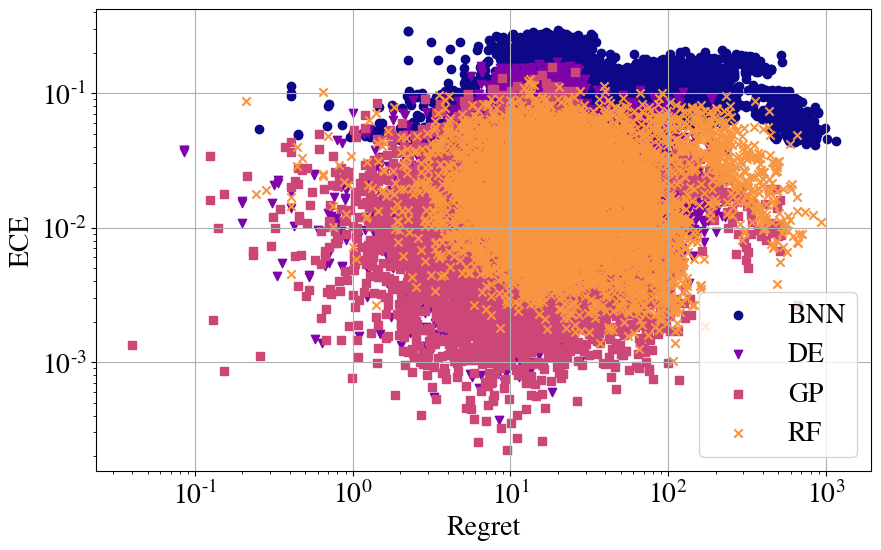

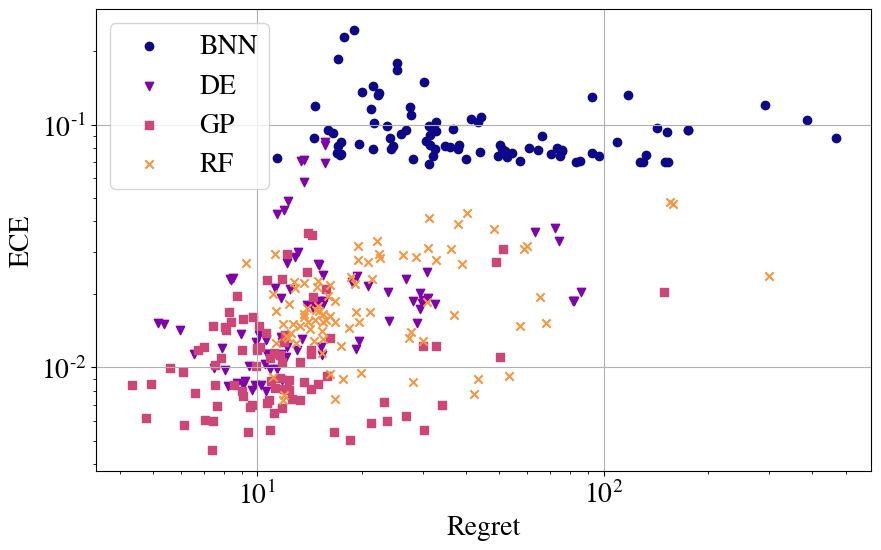

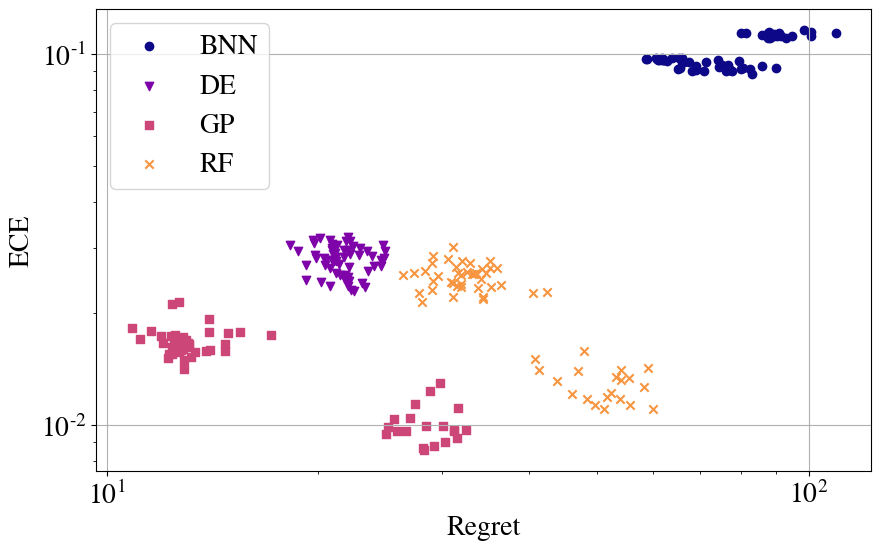

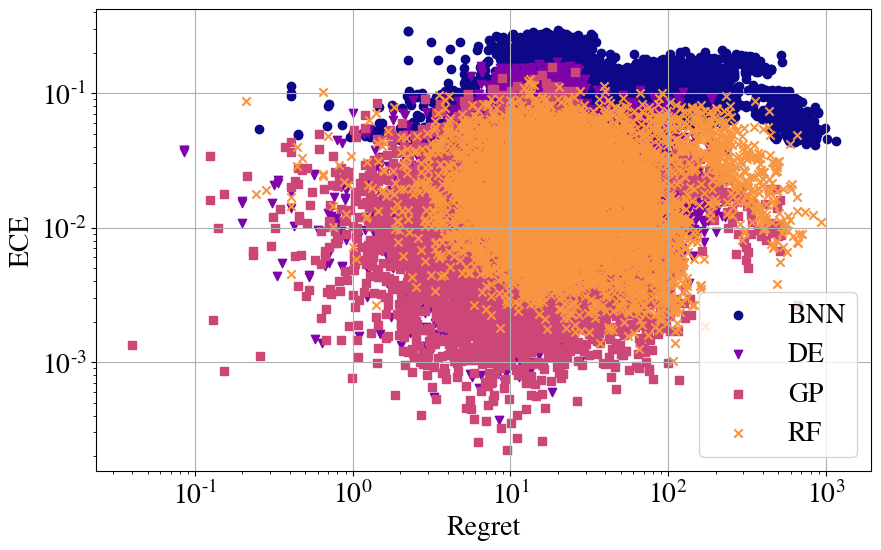

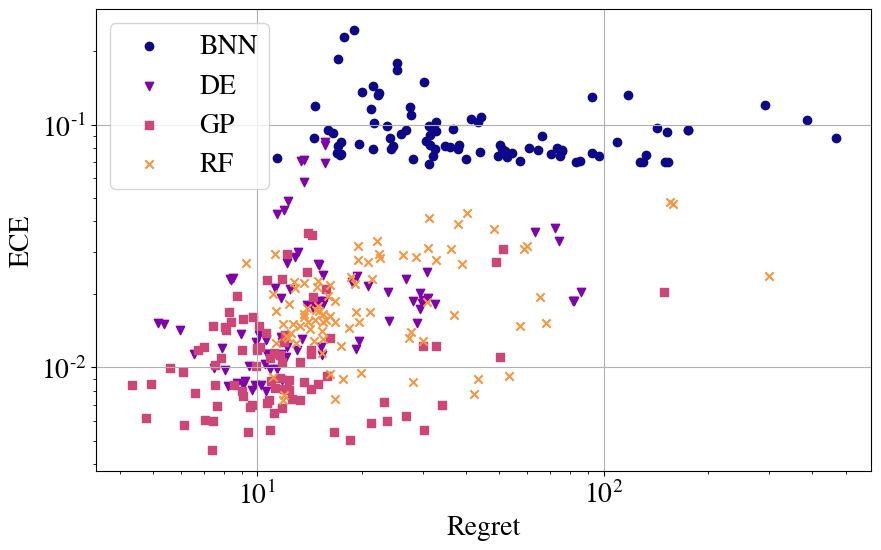

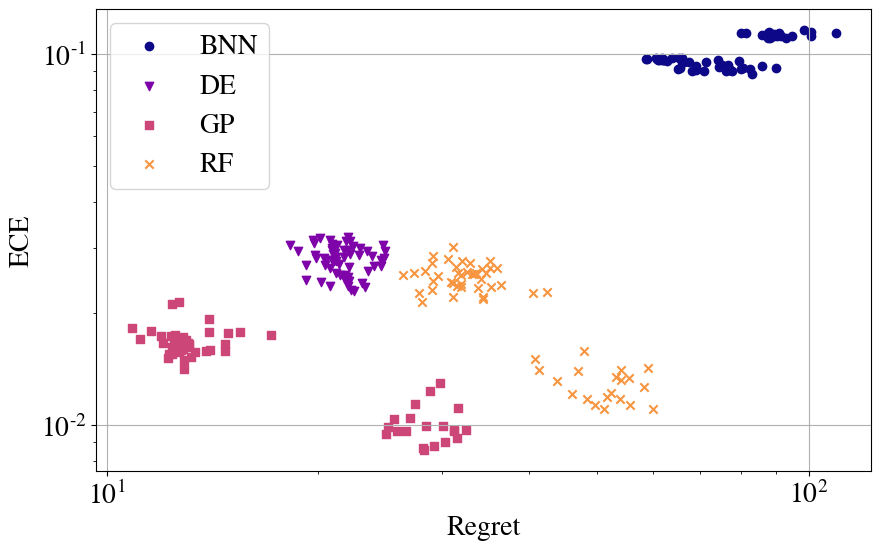

In [35]:
filehandler = open('parsed_results/synth_results.obj', 'rb') 
synth_results = pd.DataFrame.from_dict(pickle.load(filehandler))
aggregate_synth_results_df = aggregate_synthetic_results(synth_results)
regret_vs_calib_plot_synth(aggregate_synth_results_df, plot_name="synth_inst_regret_vs_calib_vanilla.pdf")
regret_vs_calib_plot_synth(aggregate_synth_results_df, aggregate="seeds", plot_name="synth_inst_regret_vs_calib_seed.pdf")
regret_vs_calib_plot_synth(aggregate_synth_results_df, aggregate="data", plot_name="synth_inst_regret_vs_calib_data.pdf")
regret_vs_calib_plot_synth(aggregate_synth_results_df, regret="tot", plot_name="synth_tot_regret_vs_calib_vanilla.pdf")
regret_vs_calib_plot_synth(aggregate_synth_results_df, aggregate="seeds", regret="tot", plot_name="synth_tot_regret_vs_calib_seed.pdf")
regret_vs_calib_plot_synth(aggregate_synth_results_df, aggregate="data", regret="tot", plot_name="synth_tot_regret_vs_calib_data.pdf")